In [2]:
!pwd

/home/william/code/ar10000/mountain_goat/notebooks


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial , signal
from mountain_goat.get_body_coordinates import get_pose_image
import ipdb

# cutting video into frames

In [3]:
filename ="cropped.mp4"
frame_list =[]
vidCap = cv2.VideoCapture(filename)
video_length = int(vidCap.get(cv2.CAP_PROP_FRAME_COUNT)) 
while vidCap.isOpened():
    success, frame = vidCap.read()
    if not success:
        break
    frame_list.append(frame)


# exploring frames

In [5]:
len(frame_list)
video_length

469

In [8]:
def resize_image(image,scale):
    """resize image with a scale"""
    scale_percent = scale# percent of original size
    img= image
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [9]:
resized_frame_list =[]
scale = 40
for image in frame_list:
    resized_image = resize_image(image, scale)
    resized_frame_list.append(resized_image)

## Trying cosine similarity

In [11]:
flattened_frames = []
for frame in resized_frame_list:
    im =frame.flatten()
    flattened_frames.append(im)
flattened_array = np.vstack(flattened_frames)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial , signal

In [19]:
# disimilar_frames= []
# length_video = len(resized_frame_list)
# similarity_dict={}
# for id, frame in enumerate(resized_frame_list):
#     if id == length_video-1:
#         break
#     if id ==0 and len(disimilar_frames) == 0: # if disimilar frames is empty add the first frame in the video
#         disimilar_frames.append(frame)
#     new_frame = frame # new  frame
    
#     recent_signf_frame = disimilar_frames[-1]#most recent significant frame
#     # get_pose_image returns dict of coordinates , so here we change teh values(the coordinates)into an array for the first and 
#     #next frame
#     new_frame_coordinates=np.array(list(get_pose_image(new_frame).values()))
#     signf_frame_coordinates = np.array(list(get_pose_image(recent_signf_frame).values()))
#     #calculating similarity
#     similarity = -1 * (spatial.distance.cosine(new_frame_coordinates, signf_frame_coordinates) - 1)
#     print(f'Calculating similarity , now on frame{id}')

# #     print(similarity)
#     if similarity < 0.9998:
#         disimilar_frames.append(new_frame)
    

#### trying angular velocity 

In [25]:
significant_frames =[]
length_video = len(resized_frame_list)
similarity_dict={}
for id, frame in enumerate(resized_frame_list):
    if id == length_video-1:
        break
    new_frame = frame
    next_frame = resized_frame_list[id +1]
    new_frame_coordinates=np.array(list(get_pose_image(new_frame).values()))
    next_frame_coordinates = np.array(list(get_pose_image(next_frame).values()))
    #calculating angle between coordinates in frames
    unit_vector_1 = new_frame_coordinates/ np. linalg. norm(new_frame_coordinates)
    unit_vector_2 = next_frame_coordinates / np. linalg. norm(next_frame_coordinates)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    print(f'Calculating angle , now on frame{id}')
    similarity_dict[f'frame{id} vs frame{id +1}'] = angle
    
        

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Calculating angle , now on frame0
Calculating angle , now on frame1
Calculating angle , now on frame2
Calculating angle , now on frame3
Calculating angle , now on frame4
Calculating angle , now on frame5
Calculating angle , now on frame6
Calculating angle , now on frame7
Calculating angle , now on frame8
Calculating angle , now on frame9
Calculating angle , now on frame10
Calculating angle , now on frame11
Calculating angle , now on frame12
Calculating angle , now on frame13
Calculating angle , now on frame14
Calculating angle , now on frame15
Calculating angle , now on frame16
Calculating angle , now on frame17
Calculating angle , now on frame18
Calculating angle , now on frame19
Calculating angle , now on frame20
Calculating angle , now on frame21
Calculating angle , now on frame22
Calculating angle , now on frame23
Calculating angle , now on frame24
Calculating angle , now on frame25
Calculating angle , now on frame26
Calculating angle , now on frame27
Calculating angle , now on fra

Calculating angle , now on frame231
Calculating angle , now on frame232
Calculating angle , now on frame233
Calculating angle , now on frame234
Calculating angle , now on frame235
Calculating angle , now on frame236
Calculating angle , now on frame237
Calculating angle , now on frame238
Calculating angle , now on frame239
Calculating angle , now on frame240
Calculating angle , now on frame241
Calculating angle , now on frame242
Calculating angle , now on frame243
Calculating angle , now on frame244
Calculating angle , now on frame245
Calculating angle , now on frame246
Calculating angle , now on frame247
Calculating angle , now on frame248
Calculating angle , now on frame249
Calculating angle , now on frame250
Calculating angle , now on frame251
Calculating angle , now on frame252
Calculating angle , now on frame253
Calculating angle , now on frame254
Calculating angle , now on frame255
Calculating angle , now on frame256
Calculating angle , now on frame257
Calculating angle , now on f

(16,)


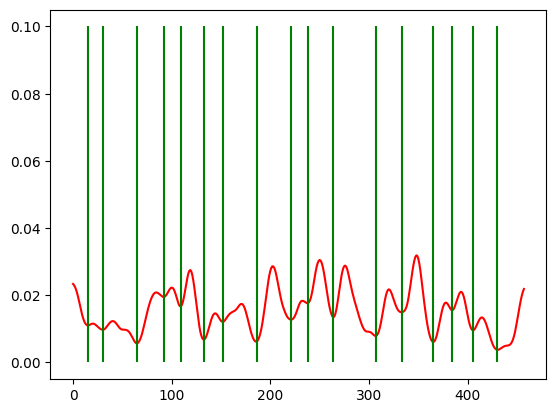

In [36]:
angles = np.array(list(similarity_dict.values()))
smooth_angles = signal.savgol_filter(x=angles, window_length=18, polyorder=3, mode='nearest')
smoother_angles = signal.savgol_filter(x=smooth_angles, window_length=18, polyorder=3, mode='nearest')
smoother_angles = signal.savgol_filter(x=smoother_angles, window_length=18, polyorder=3, mode='nearest')
minima_indices= signal.argrelmin(smoother_angles)
print(maxima_indices[0].shape)
# plt.plot(angles)
# plt.plot(smooth_angles, color='b')
plt.plot(smoother_angles, color='r')
plt.vlines(minima_indices[0], ymin=0, ymax=0.10, colors='g')

In [37]:
minima_indices

(array([ 15,  30,  65,  92, 109, 133, 152, 186, 221, 238, 264, 307, 333,
        365, 384, 405, 430]),)

# Bringing everything together

In [4]:
def resize_image(image,scale):
    """resize image with a scale"""
    scale_percent = scale# percent of original size
    img= image
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [5]:
def get_significant_frames(file_path, resizing_scale=40, show_frames= True):
    #capturing frames
    filename = file_path
    frame_list =[]
    vidCap = cv2.VideoCapture(filename)
    video_length = int(vidCap.get(cv2.CAP_PROP_FRAME_COUNT))
    while vidCap.isOpened():
        success, frame = vidCap.read()
        if not success:
            break
        frame_list.append(frame)
    print(f'######## number of frames captured is {len(frame_list)} and video length is {video_length}')
    print(f'######## shape of frames is {frame_list[0].shape}')
    
    # resizing frames 
    resized_frame_list =[]
    scale = resizing_scale
    print('##### resizing frames .....')
    for image in frame_list:
        resized_image = resize_image(image, scale)
        resized_frame_list.append(resized_image)
    print(f'#### resized frames shape is {resized_frame_list[0].shape}')
    
    # getting significant frames
    length_video = len(resized_frame_list)
    angles_dict={}
    print(f'####### Calculating angle.....')
    for id, frame in enumerate(resized_frame_list):
        if id == length_video-1:
            # break if there are no more frames in the list
            break
        new_frame = frame
        next_frame = resized_frame_list[id +1]
        
        # get_pose_image returns dict of coordinates , so here we change teh values(the coordinates)into an array for the first
        # and next frame
        new_frame_coordinates=np.array(list(get_pose_image(new_frame).values()))
        next_frame_coordinates = np.array(list(get_pose_image(next_frame).values()))
        
        #calculating angle between coordinates in frames
        unit_vector_1 = new_frame_coordinates/ np. linalg. norm(new_frame_coordinates)
        unit_vector_2 = next_frame_coordinates / np. linalg. norm(next_frame_coordinates)
        dot_product = np. dot(unit_vector_1, unit_vector_2)
        angle = np. arccos(dot_product)
        angles_dict[f'frame{id} vs frame{id +1}'] = angle

    #spikes when a climber makes a move , so we need to get the minima
    angles = np.array(list(angles_dict.values()))
    # apply three layers of smoothing
    print(f'##### applying smoothing layers ..')
    smooth_angles = signal.savgol_filter(x=angles, window_length=18, polyorder=3, mode='nearest')
    smoother_angles = signal.savgol_filter(x=smooth_angles, window_length=18, polyorder=3, mode='nearest')
    smoother_angles = signal.savgol_filter(x=smoother_angles, window_length=18, polyorder=3, mode='nearest')
    minima_indices= signal.argrelmin(smoother_angles)
    print(f'number of significant frames found is {minima_indices[0].shape}')
    
    # plotting angles from frames
    if show_frames:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        ax[0].plot(angles, label ='angles')
        ax[0].set_title('Angles between frames')
        ax[1].plot(smoother_angles, color='r', label='smooth_angles')
        ax[1].set_title('Smooth angles with minimas ')
        ax[1].vlines(minima_indices[0], ymin=0, ymax=0.10, colors='g', label='signf_frames')
        plt.legend()
        plt.show()
        
    # using indices of maxima's to get significant frames
    significant_frames =[]
    print(f'####### getting significant frames from minima indices...')
    for index in minima_indices[0]:
#         print(f'getting frame {index}..')
        significant_frames.append(resized_frame_list[index])
        
    return significant_frames
